In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
# Loading data and keeping only variables required for prediction
data = pd.read_csv("./Engineered_Features/training_data.csv",
                   parse_dates=['Date'])

data = data[["Date", "Year", "Month",
             "NHI_SWIR_Blast_Furnace_A_Q80_max", "Value"]]

In [ ]:
# setting NHI SWIR values in  March & June 2022 images to null 
# as they are clearly cloudy and causing the image to be noisy
data.loc[[2,5], "NHI_SWIR_Blast_Furnace_A_Q80_max"] = np.nan

In [ ]:
# Setting the date as an index to the dataframe.
# Interpolating the null values which have been removed in previous step.
data = data.set_index("Date")
data.interpolate(method="time", inplace=True)

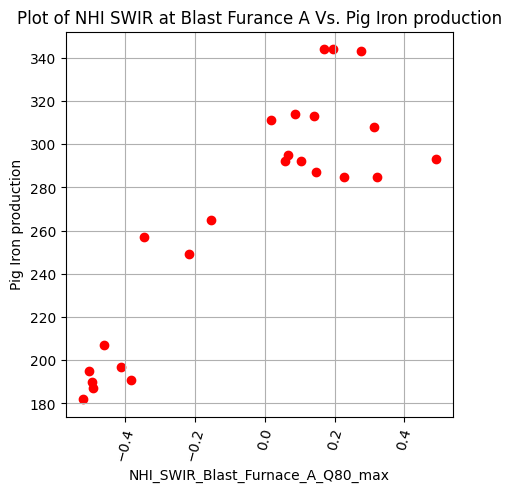

In [ ]:
# Scatter plot of NHI SWIR after interpolating values of two images.
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(data["NHI_SWIR_Blast_Furnace_A_Q80_max"], data["Value"], c="r")
ax.set_xlabel("NHI_SWIR_Blast_Furnace_A_Q80_max")
ax.grid()
ax.set_ylabel("Pig Iron production")
ax.tick_params(rotation=75, axis="x")
ax.set_title("Plot of NHI SWIR at Blast Furance A Vs. Pig Iron production")
plt.show()

In [ ]:
# Fitting linear regression model on the newly interpolated data, and writing the predicted values to file
model = smf.ols(formula='Value ~ NHI_SWIR_Blast_Furnace_A_Q80_max', data=data).fit()
predictions = model.predict(data["NHI_SWIR_Blast_Furnace_A_Q80_max"])
predictions.to_csv("./Engineered_Features/predictions.csv", index=False)

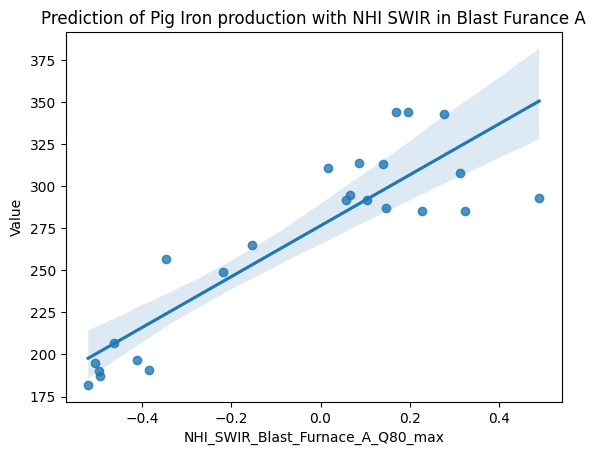

In [ ]:
# Scatter plot of the regression relationship between NHI SWIR and the target variable.
sns.regplot(data=data, x='NHI_SWIR_Blast_Furnace_A_Q80_max', y='Value')
plt.title("Prediction of Pig Iron production with NHI SWIR in Blast Furance A")
plt.show()

In [ ]:
# R2 is selected to show the goodness of fit of the regression model
r2 = r2_score(data["Value"], predictions)
print(f"R2 of the pig iron prediction is {round(r2,2)}")

R2 of the pig iron prediction is 0.79


In [ ]:
# Showing the details of the model, this summary show s the values of the intercept and coefficient of NHI SWIR.
# The intercept and coefficient will be used in the linear equation to obtain prediction.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     80.78
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           8.11e-09
Time:                        20:40:59   Log-Likelihood:                -111.08
No. Observations:                  24   AIC:                             226.2
Df Residuals:                      22   BIC:                             228.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep